In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Crime_Dataset_Coursework1.csv')


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1745272010.py:5: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crime_Dataset_Coursework1.csv')


In [6]:
df.info

<bound method DataFrame.info of         Incident ID Offence Code  CR Number    Dispatch Date / Time  \
0         201202980         3550  180042096  08/23/2018 09:52:08 PM   
1         201181293         3522  180015424  03/30/2018 01:00:55 AM   
2         201181293         3562  180015424  03/30/2018 01:00:55 AM   
3         201193163         3520  180029476  06/14/2018 10:26:45 PM   
4         201204355         2204  180043926  09/03/2018 12:06:54 PM   
...             ...          ...        ...                     ...   
306089    201320571         1399  210006666  02/21/2021 07:25:28 AM   
306090    201329875         2305  210017101  05/06/2021 10:54:47 PM   
306091    201329751         5016  210016952  05/05/2021 10:38:58 PM   
306092    201323117         9099  210009468  03/13/2021 12:07:14 PM   
306093    201327806         2305  210014587  04/19/2021 02:17:29 PM   

       NIBRS Code  Victims             Crime Name1  \
0             35B        1   Crime Against Society   
1      

### STEP 1 ropping Columns with Excessive Missing Values
Since Street Suffix and Street Prefix have over 95% missing values, they provide limited data utility and should be dropped to maintain data quality.

python
Copy code

Explanation
columns_to_drop lists columns with more than 95% missing values.
df.drop() with inplace=True modifies the DataFrame directly, removing these columns.

In [5]:
# Dropping columns with excessive missing values (e.g., more than 95% missing values)
columns_to_drop = ['Street Suffix', 'Street Prefix']
df.drop(columns=columns_to_drop, inplace=True)

print("Dropped columns with excessive missing values:", columns_to_drop)


Dropped columns with excessive missing values: ['Street Suffix', 'Street Prefix']


### Step 2: Imputing Missing Values for Dispatch Date / Time and End_Date_Time Using Forward/Backward Fill
For Dispatch Date / Time and End_Date_Time, a forward fill (propagating the previous entry) is suitable for time-related data. We can also apply a backward fill as a fallback.

## Explanation
fillna(method='ffill') fills missing values by propagating the last valid observation forward.
fillna(method='bfill') fills remaining missing values by using the next valid observation backward.


In [7]:
# Using forward and backward fill for Dispatch Date / Time and End_Date_Time
df['Dispatch Date / Time'].fillna(method='ffill', inplace=True)
df['End_Date_Time'].fillna(method='bfill', inplace=True)

print("Applied forward/backward fill for time-related columns.")


Applied forward/backward fill for time-related columns.


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1767100252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dispatch Date / Time'].fillna(method='ffill', inplace=True)
C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1767100252.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Dispatch Date / Time'].fillna(method='ffill', inplace=True)
C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1767100252.py:3: FutureWarning: A value is

### Step 3: Imputing Missing Values for Numeric Columns Using Mean/Median
For numeric columns like Zip Code, which might have a small percentage of missing values, we can use either the mean or median to fill in the missing values. Here, I’ll demonstrate using the median.

## Explanation
fillna(df['Zip Code'].median()) replaces missing values with the median value of the Zip Code column, which is less sensitive to outliers than the mean.

In [9]:
# Imputing missing values in the 'Zip Code' column with the median value
if 'Zip Code' in df.columns:
    df['Zip Code'].fillna(df['Zip Code'].median(), inplace=True)

print("Imputed missing values in 'Zip Code' with median.")


Imputed missing values in 'Zip Code' with median.


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\2440143527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zip Code'].fillna(df['Zip Code'].median(), inplace=True)


### Step 4: Imputing Categorical Columns Using Mode or Default Value
For categorical columns, such as Block Address, if they have a moderate level of missing values, we can fill missing entries with the mode (most frequent value) or a default label like "Unknown."

## Explanation
mode()[0] extracts the most frequent value in Block Address, using it to fill missing values.
This helps to maintain consistency in categorical columns by replacing null values with a commonly used value.

In [11]:
# Imputing missing values in 'Block Address' with the mode (most common value)
if 'Block Address' in df.columns:
    df['Block Address'].fillna(df['Block Address'].mode()[0], inplace=True)

print("Imputed missing values in 'Block Address' with the mode.")


Imputed missing values in 'Block Address' with the mode.


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\3827405129.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Block Address'].fillna(df['Block Address'].mode()[0], inplace=True)


### Step 5: Verifying Missing Values
After the imputation steps, let’s check if any columns still have missing values.

## Explanation
isnull().sum() gives a count of missing values in each column, allowing us to verify that the imputation was successful.

In [13]:
# Checking for any remaining missing values
print("Remaining missing values per column:")
print(df.isnull().sum())


Remaining missing values per column:
Incident ID                   0
Offence Code                  0
CR Number                     0
Dispatch Date / Time          0
NIBRS Code                    0
Victims                       0
Crime Name1                 272
Crime Name2                 272
Crime Name3                 272
Police District Name         94
Block Address                 0
City                       1276
State                         0
Zip Code                      0
Agency                        0
Place                         0
Sector                     1530
Beat                       1530
PRA                         239
Address Number            26109
Street Name                   1
Street Type                 339
Start_Date_Time               0
End_Date_Time                 0
Latitude                      0
Longitude                     0
Police District Number        0
Location                      0
dtype: int64


### 
Based on the remaining missing values, we can apply specific strategies to address them. Here’s how to handle each column with missing values and the code to do so.

## Columns with Few Missing Values (<1%):

Crime Name1, Crime Name2, Crime Name3: Fill with 'Unknown' since these are categorical columns and missing values might indicate cases without detailed crime type classification.
Police District Name: Also fill with 'Unknown' for consistency.
Street Name and Street Type: These have very few missing values, so we can fill these with 'Unknown'.

## Columns with Moderate Missing Values:

City: We can fill missing values with the most frequent city, assuming this is the main location of the data.
PRA, Beat, Sector: These could represent patrol areas or specific sectors, so filling them with 'Unknown' would be appropriate.

## Columns with High Missing Values (Address Number):

For Address Number, we can fill with 'Unknown' since it might not be critical for high-level analysis.

### Explanation:
Fill with 'Unknown': For most categorical columns, 'Unknown' is used to denote unavailable data without removing the row or compromising data integrity.
Most Frequent Value: For City, filling with the mode is effective when missing values are sparse and a single dominant value exists.
After running this, you should have no missing values left in the dataset. This ensures all rows are kept intact for analysis while minimizing the effect of missing data.

In [15]:
# Fill missing values with 'Unknown' for categorical columns
df['Crime Name1'].fillna('Unknown', inplace=True)
df['Crime Name2'].fillna('Unknown', inplace=True)
df['Crime Name3'].fillna('Unknown', inplace=True)
df['Police District Name'].fillna('Unknown', inplace=True)
df['Street Name'].fillna('Unknown', inplace=True)
df['Street Type'].fillna('Unknown', inplace=True)
df['PRA'].fillna('Unknown', inplace=True)
df['Beat'].fillna('Unknown', inplace=True)
df['Sector'].fillna('Unknown', inplace=True)

# Fill City with the most frequent city
most_common_city = df['City'].mode()[0]
df['City'].fillna(most_common_city, inplace=True)

# For Address Number, filling with 'Unknown'
df['Address Number'].fillna('Unknown', inplace=True)

# Confirm remaining missing values
print("Remaining missing values per column:\n", df.isnull().sum())


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1233057713.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crime Name1'].fillna('Unknown', inplace=True)
C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1233057713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Remaining missing values per column:
 Incident ID               0
Offence Code              0
CR Number                 0
Dispatch Date / Time      0
NIBRS Code                0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
Block Address             0
City                      0
State                     0
Zip Code                  0
Agency                    0
Place                     0
Sector                    0
Beat                      0
PRA                       0
Address Number            0
Street Name               0
Street Type               0
Start_Date_Time           0
End_Date_Time             0
Latitude                  0
Longitude                 0
Police District Number    0
Location                  0
dtype: int64


### Question 1: Is there a clear decrease in crime over the years?
Analysis Approach:

Time Series Analysis - to observe trends over time.
Linear Regression - to model the overall trend.
Moving Average - to smooth out fluctuations and see general patterns.

## Explanation

### Date Parsing and Extraction:
By specifying the date format in pd.to_datetime, we eliminate the warning and ensure consistency in date parsing. Here, %Y-%m-%d %H:%M:%S is used as an example format. Adjust it based on your dataset’s actual date format.

### Visualization 1 (Line Plot):
This plot shows the annual crime count trend, making it easier to observe any overall decrease or increase over the years.

### Visualization 2 (Moving Average):
The moving average plot smooths out yearly fluctuations, revealing long-term trends. A 3-year moving average (which you can adjust) provides a clearer view of the trend by reducing short-term irregularities.

These two visualizations together provide a comprehensive view of the yearly crime trend and highlight any overall increase or decrease over time.

Crime Count Statistical Summary Over the Years:
count        6.000000
mean     51015.666667
std      14121.806509
min      28738.000000
25%      46601.500000
50%      52722.500000
75%      54692.250000
max      72001.000000
dtype: float64


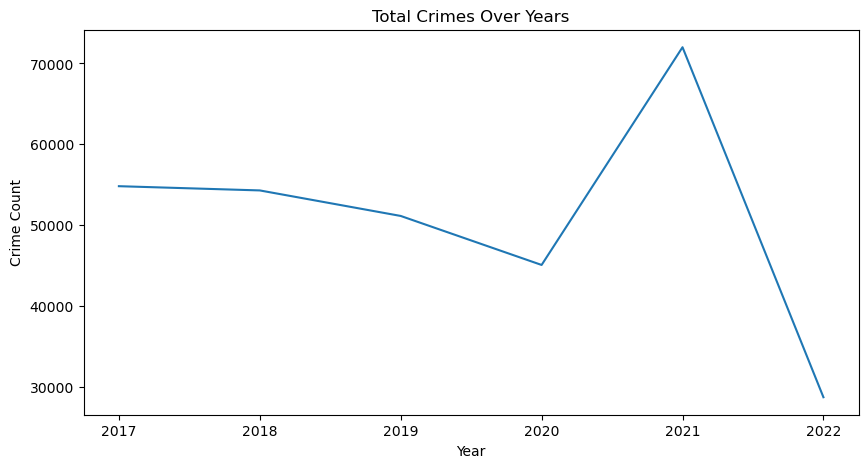

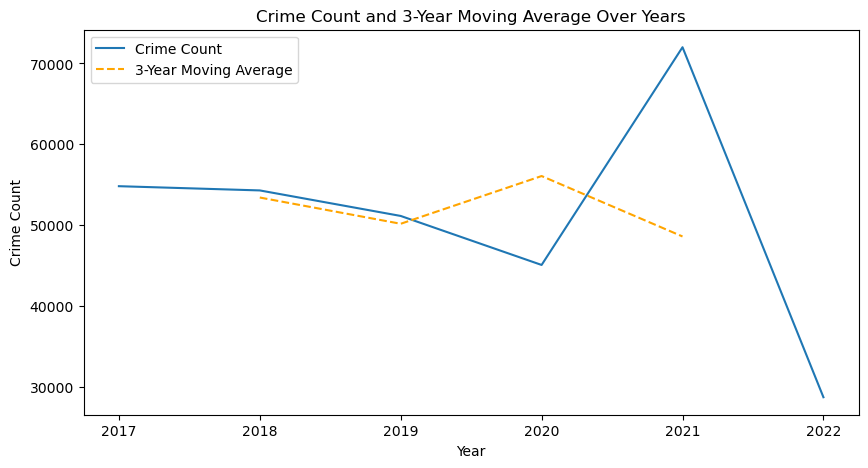

In [94]:
# Specify the correct date format for 'Dispatch Date / Time'
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the year from the parsed date
df['Year'] = df['Dispatch Date / Time'].dt.year

# Group by year to get crime counts
crime_yearly = df.groupby('Year').size()

# Display the statistical summary of the crime count by year
crime_summary = crime_yearly.describe()

# Print the statistical summary
print("Crime Count Statistical Summary Over the Years:")
print(crime_summary)

# Visualization 1: Line plot for crime count by year
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
crime_yearly.plot(title='Total Crimes Over Years', kind='line', xlabel='Year', ylabel='Crime Count')
plt.show()

# Visualization 2: Adding a Moving Average for smoother trend visualization
crime_yearly_rolling = crime_yearly.rolling(window=3, center=True).mean()  # 3-year moving average
plt.figure(figsize=(10, 5))
plt.plot(crime_yearly.index, crime_yearly, label='Crime Count')
plt.plot(crime_yearly.index, crime_yearly_rolling, label='3-Year Moving Average', color='orange', linestyle='--')
plt.title("Crime Count and 3-Year Moving Average Over Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.show()


### Question 2: Which crimes have decreased the most?
Analysis Approach:

Categorical Analysis - to count each crime type.
Percentage Change - to calculate the decrease rate for each crime type over time.
python
Copy code

## Explanation: 
By tracking crime types over the years and calculating percentage change, we identify which crimes have decreased most. Categorical analysis with line plots shows trends, while bar charts of percentage changes highlight specific decreases. This approach helps prioritize resources for declining crimes and identify successes in crime prevention.

Crime Name1  Crime Against Person  Crime Against Property  \
Year                                                        
2017                         4319                   21272   
2018                         5112                   21646   
2019                         4960                   21936   
2020                         4452                   22888   
2021                         8050                   37914   

Crime Name1  Crime Against Society  Not a Crime  Other  Unknown  
Year                                                             
2017                         13927          957  14335       13  
2018                         15851          626  11056        9  
2019                         12905          636  10673       35  
2020                          7254          521   9878       94  
2021                         15091          440  10422       84  


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1620371866.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_type_year = df.groupby(['Year', 'Crime Name1']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

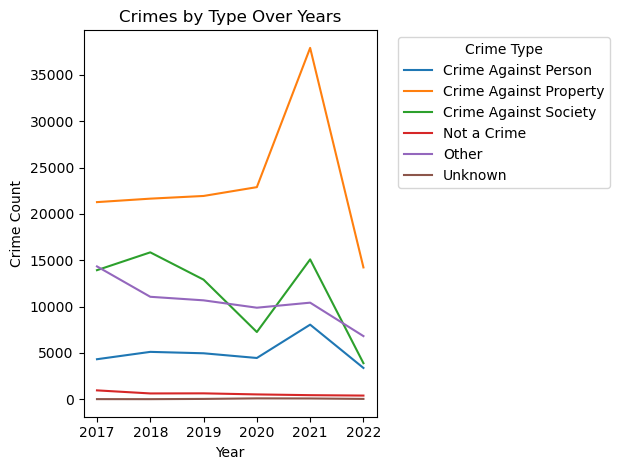

Crime Name1
Not a Crime              -0.153692
Other                    -0.125798
Crime Against Society    -0.029505
Crime Against Property    0.021219
Crime Against Person      0.055827
Unknown                   0.720201
dtype: float64


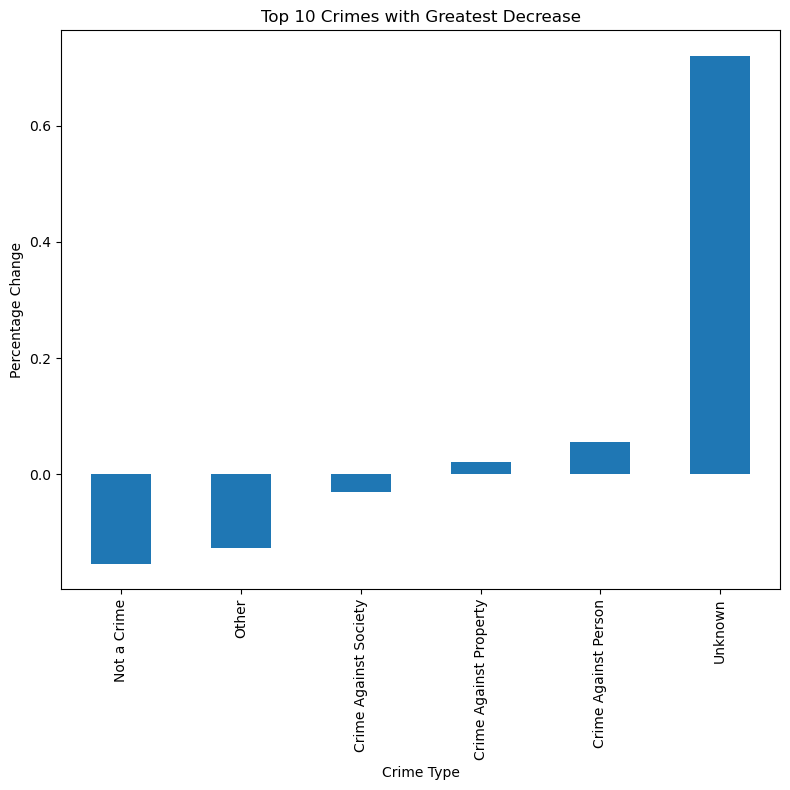

In [19]:
# Step 1: Clean 'Crime Name1' to handle any inconsistencies
df['Crime Name1'] = df['Crime Name1'].fillna('Unknown')  # Fill missing values with 'Unknown'
df['Crime Name1'] = df['Crime Name1'].str.strip()  # Remove any extra spaces
df['Crime Name1'] = df['Crime Name1'].astype('category')  # Ensure the column is treated as categorical

# Step 2: Group crime data by year and type, filling missing values with 0
crime_by_type_year = df.groupby(['Year', 'Crime Name1']).size().unstack(fill_value=0)

# Check if the data looks correct (optional)
print(crime_by_type_year.head())

# Step 3: Plot crime data by year and type
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
crime_by_type_year.plot(kind='line', title='Crimes by Type Over Years')
plt.ylabel("Crime Count")
plt.xlabel("Year")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # To avoid overlap with legend
plt.show()

# Step 4: Calculate the percentage change and visualize the greatest decrease
crime_change = crime_by_type_year.pct_change().mean().sort_values(ascending=True).head(10)

# Check if the crime_change data looks correct (optional)
print(crime_change)

# Plot the top 10 crimes with the greatest decrease
plt.figure(figsize=(8, 8))
crime_change.plot(kind='bar', title='Top 10 Crimes with Greatest Decrease')
plt.ylabel("Percentage Change")
plt.xlabel("Crime Type")
plt.tight_layout()  # To make sure everything fits
plt.show()


### Question 3: Which area has experienced the greatest decrease in crime rates?
Analysis Approach:

Geospatial Analysis - to visualize crime trends by area.
Percentage Change by Area - to determine where crime rates have dropped most.

## Explanation: 
Using police district data, we can map crime reductions across different areas. This insight helps focus law enforcement in areas with increasing crime, providing data for resource allocation.

Crime Counts by Area and Year:
Police District Name  BETHESDA  CITY OF TAKOMA PARK  GERMANTOWN  \
Year                                                              
2017                      7150                 1363        6935   
2018                      7184                 1264        7215   
2019                      7022                 1285        6161   
2020                      6443                 1214        5773   
2021                     10444                 1278        9471   
2022                      4534                    4        3700   

Police District Name  MONTGOMERY VILLAGE  OTHER  ROCKVILLE  SILVER SPRING  \
Year                                                                        
2017                                9441      2       7683          11568   
2018                                8861      3       7494          11497   
2019                                8549     18       7050          11265   
2020                                7845     21

<Figure size 1200x600 with 0 Axes>

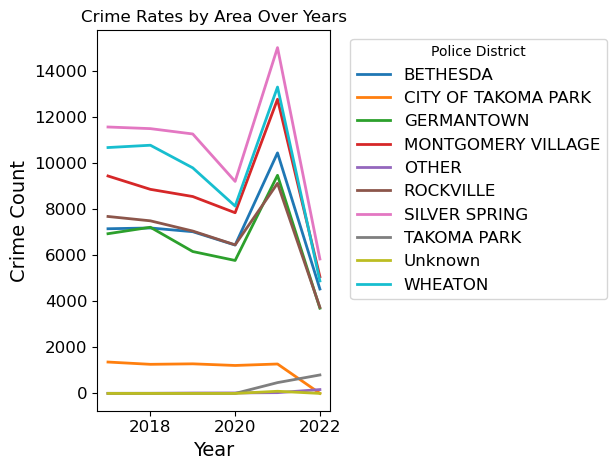


Top 10 Areas with Greatest Crime Rate Decrease:
Police District Name
CITY OF TAKOMA PARK   -0.211085
ROCKVILLE             -0.069026
WHEATON               -0.049751
SILVER SPRING         -0.037873
MONTGOMERY VILLAGE    -0.030778
GERMANTOWN            -0.027490
BETHESDA              -0.009028
OTHER                  2.045378
TAKOMA PARK                 inf
Unknown                     inf
dtype: float64


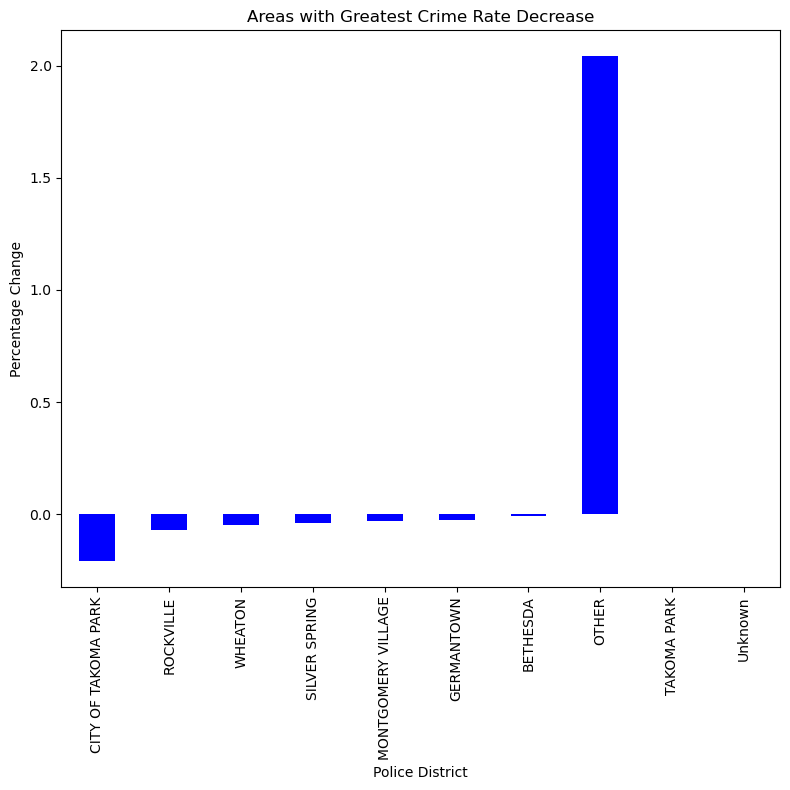

In [21]:
import matplotlib.pyplot as plt

# Grouping by Police District and Year to get crime rates over the years for each area
area_crime_year = df.groupby(['Year', 'Police District Name']).size().unstack(fill_value=0)

# 1. Geospatial Analysis - Crime trends by area over the years with a larger figure
print("Crime Counts by Area and Year:")
print(area_crime_year)  # Printing the data

plt.figure(figsize=(12, 6))  # Increased size for better readability
area_crime_year.plot(kind='line', title='Crime Rates by Area Over Years', linewidth=2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Crime Count", fontsize=14)
plt.legend(title='Police District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. Percentage Change by Area - Areas with the greatest decrease in crime rates
area_crime_change = area_crime_year.pct_change().mean().sort_values(ascending=True).head(10)

# Printing the percentage change data
print("\nTop 10 Areas with Greatest Crime Rate Decrease:")
print(area_crime_change)

# Plotting the areas with greatest crime rate decrease
plt.figure(figsize=(8, 8))
area_crime_change.plot(kind='bar', title='Areas with Greatest Crime Rate Decrease', color='blue')
plt.ylabel("Percentage Change")
plt.xlabel("Police District")
plt.tight_layout()
plt.show()


# Question 4: What are the most common types of crimes in this dataset?
Analysis Approach:

Bar Chart - for frequency of each primary crime type.
Pie Chart - to show the proportion of each crime type.

# Explanation: 
Knowing the most common crimes helps law enforcement and policymakers target prevalent issues. Bar and pie charts offer a comprehensive view of crime distribution.

Crime Frequencies:
 Crime Name1
Crime Against Property    139882
Crime Against Society      68917
Other                      63178
Crime Against Person       30270
Not a Crime                 3575
Unknown                      272
Name: count, dtype: int64


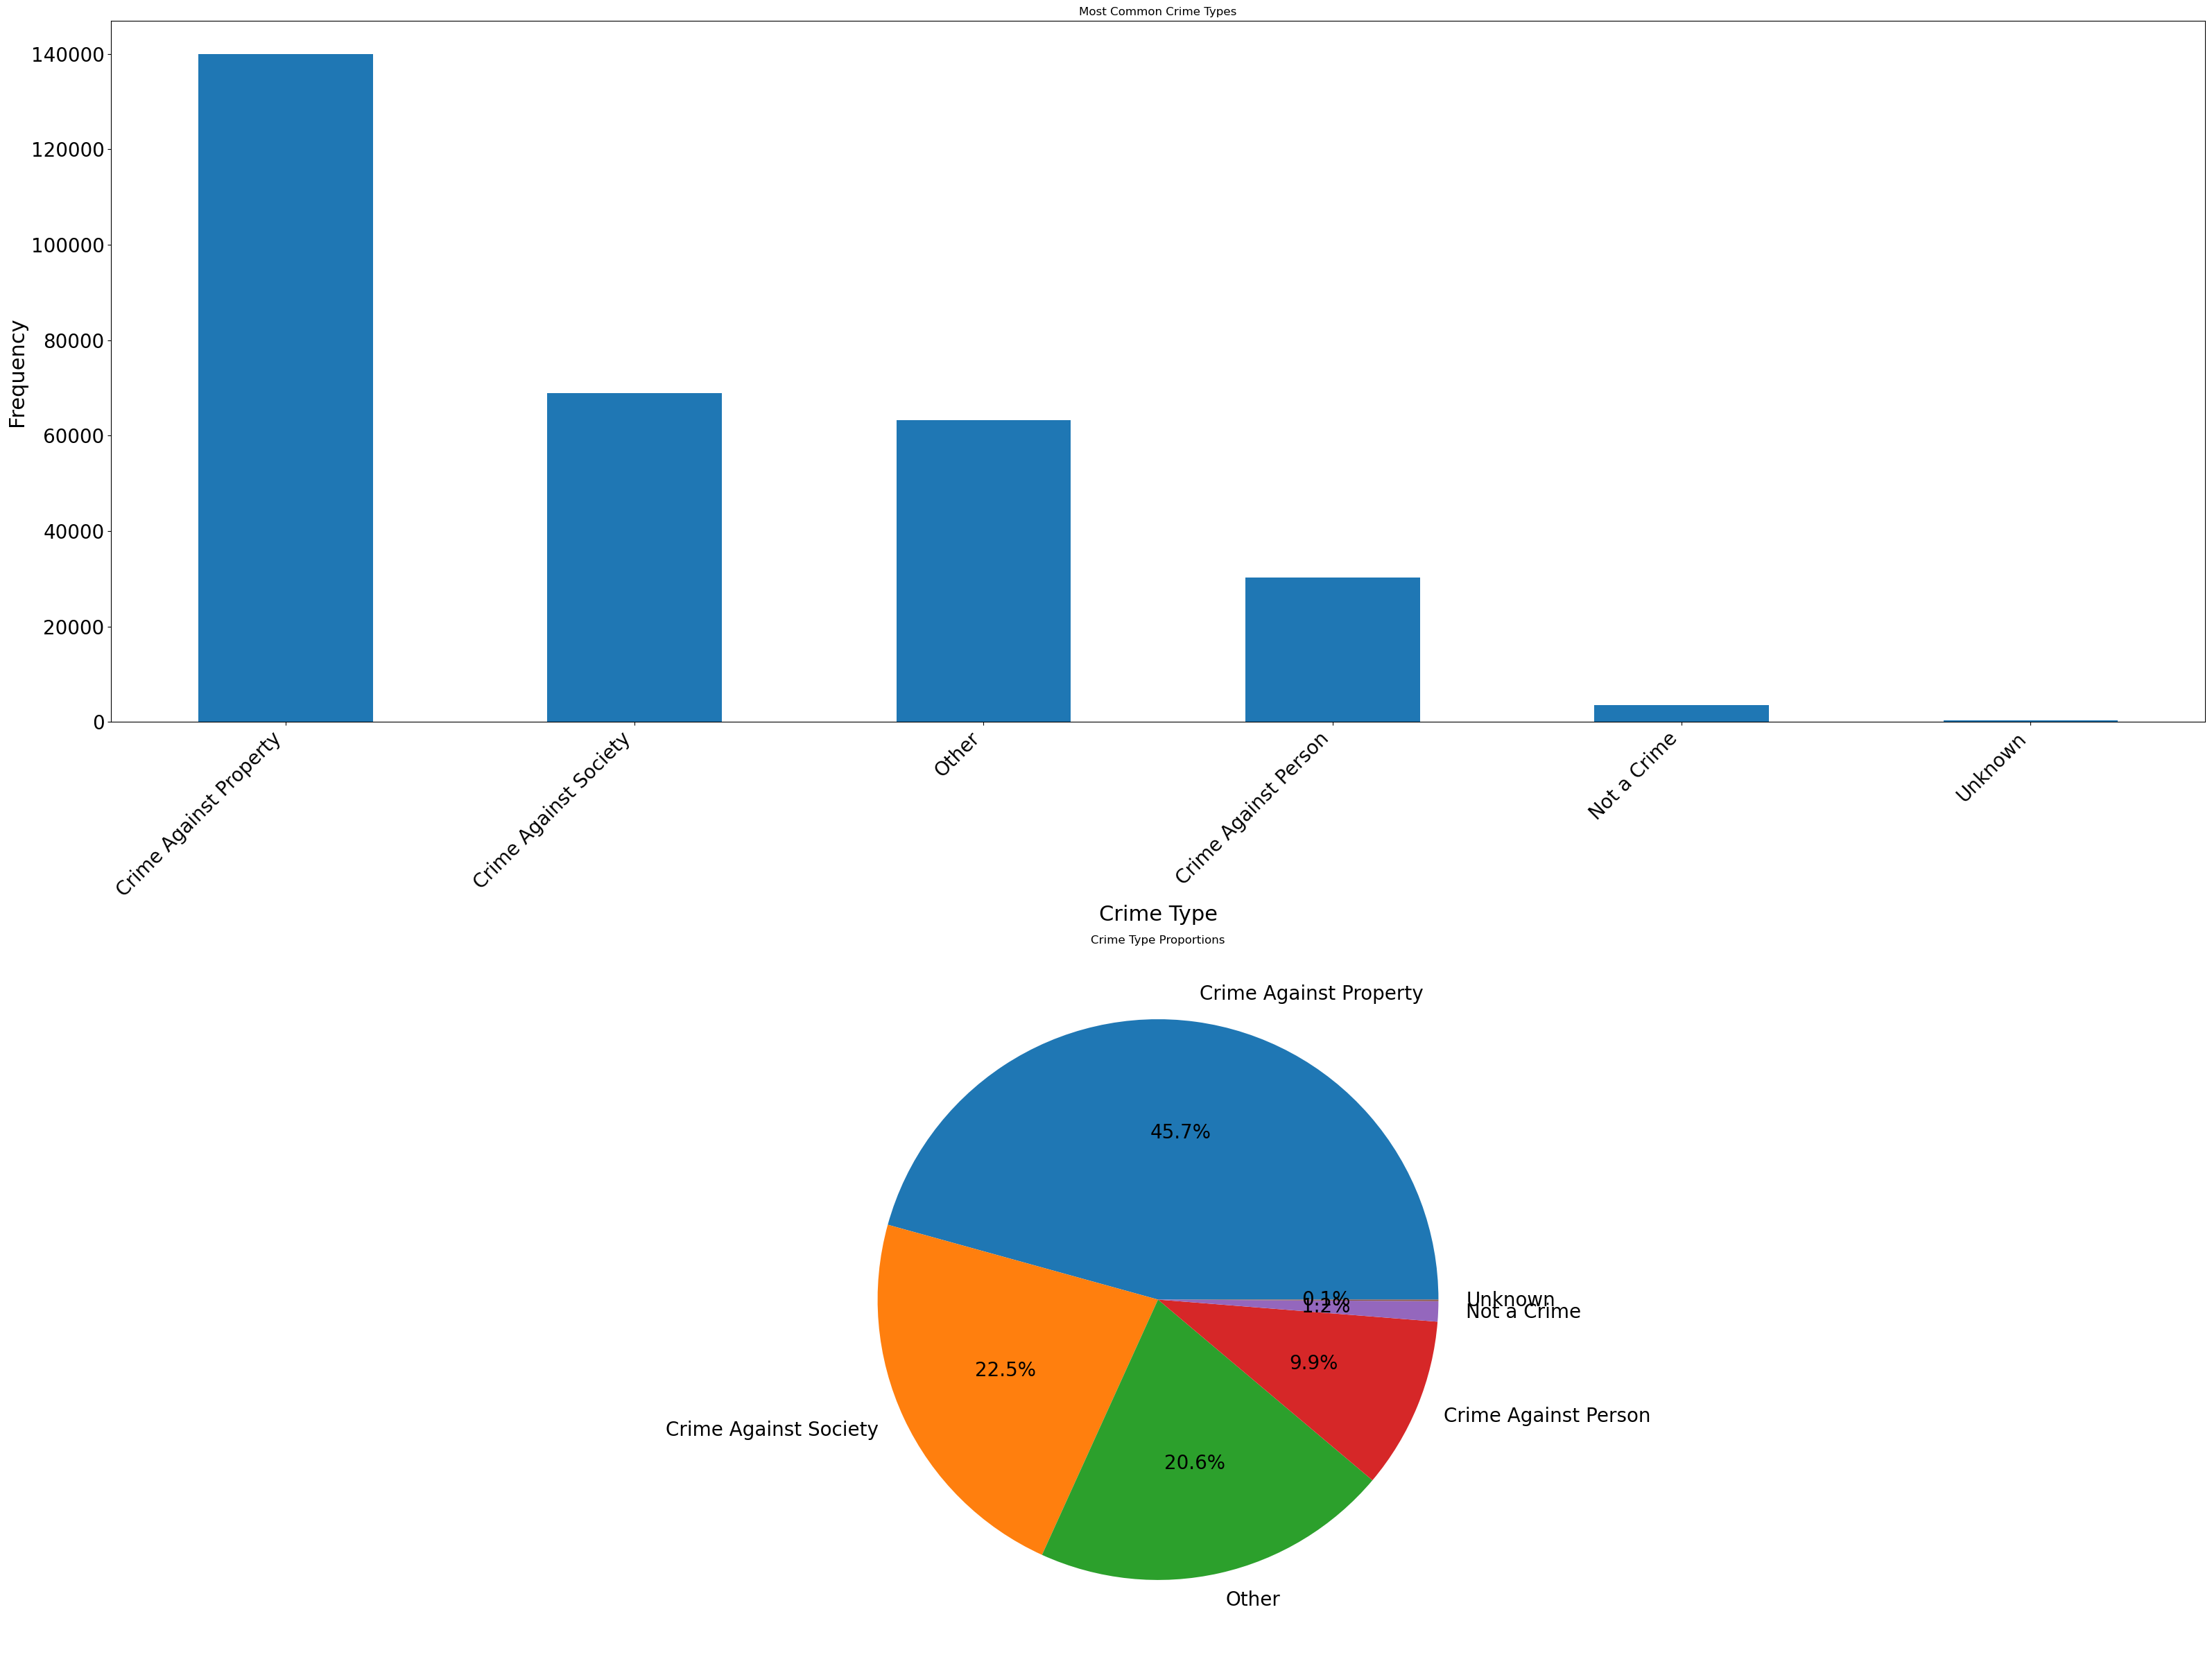


Crime Type Proportions (%):
 Crime Name1
Crime Against Property    45.699034
Crime Against Society     22.514979
Other                     20.640065
Crime Against Person       9.889119
Not a Crime                1.167942
Unknown                    0.088862
Name: count, dtype: float64


In [23]:
import matplotlib.pyplot as plt

# Get crime type frequencies
crime_counts = df['Crime Name1'].value_counts()

# Print the crime frequencies for reference
print("Crime Frequencies:\n", crime_counts)

# Bar Chart for Crime Frequency
plt.figure(figsize=(32, 24))  # Double the figure size from previous one (making it 32x24)
plt.subplot(2, 1, 1)  # Plot the bar chart in the first row of a 2x1 grid
crime_counts.plot(kind='bar', title='Most Common Crime Types', fontsize=20)
plt.xlabel('Crime Type', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=20)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=20)

# Pie Chart for Crime Proportion
plt.subplot(2, 1, 2)  # Plot the pie chart in the second row of the same grid
crime_counts.plot(kind='pie', title='Crime Type Proportions', autopct='%1.1f%%', fontsize=20)
plt.ylabel('')  # Hide the y-label for pie chart
plt.xticks(fontsize=20)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Print the proportions (percentage) for each crime type
crime_proportions = crime_counts / crime_counts.sum() * 100
print("\nCrime Type Proportions (%):\n", crime_proportions)


# Question 5: How do crime incident frequencies vary by police district?
Analysis Approach:

Bar Chart - for incidents per Police District Name.
Geographic Heat Map - using latitude and longitude for district crime counts.

# Explanation:
Visualizing crime by district shows hotspots and distribution, guiding district-level crime prevention.                                                  

In [27]:
import folium
from folium.plugins import HeatMap


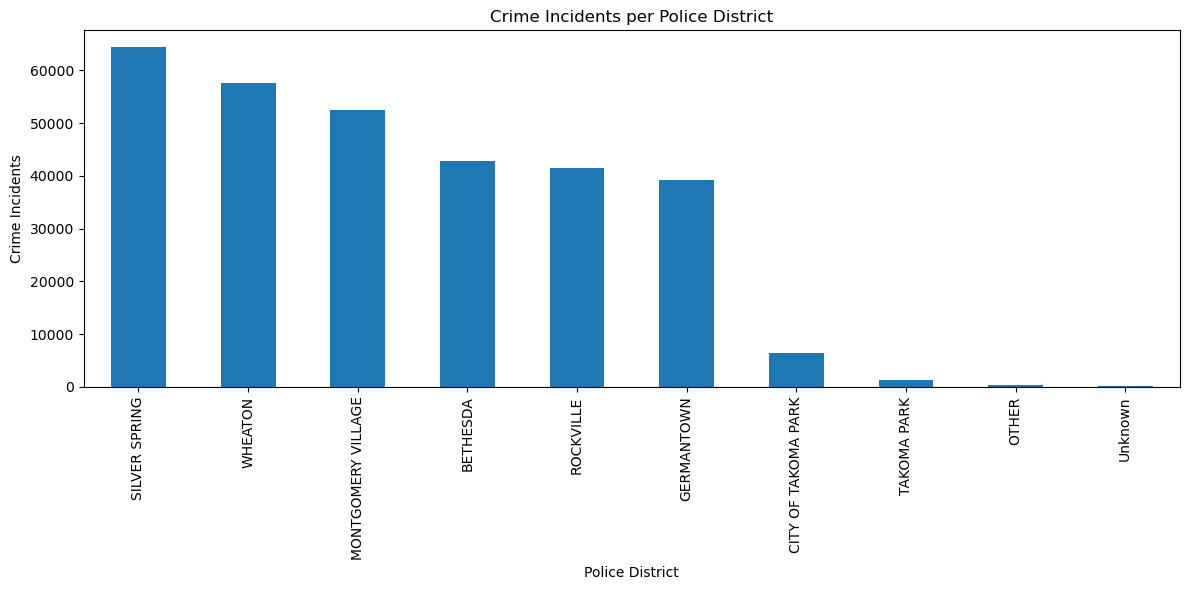

Crime Incidents per Police District:
 Police District Name
SILVER SPRING          64388
WHEATON                57568
MONTGOMERY VILLAGE     52539
BETHESDA               42777
ROCKVILLE              41535
GERMANTOWN             39255
CITY OF TAKOMA PARK     6408
TAKOMA PARK             1284
OTHER                    246
Unknown                   94
Name: count, dtype: int64
Geographic Heatmap saved as 'crime_heatmap.html'. Open this file in your browser to view the map.


In [29]:
# Bar Chart for Crime Incidents per Police District
import matplotlib.pyplot as plt

# Crime Incidents per Police District - Bar chart
plt.figure(figsize=(12, 6))  # Adjust the size for better readability
df['Police District Name'].value_counts().plot(kind='bar', title='Crime Incidents per Police District')
plt.xlabel('Police District')
plt.ylabel('Crime Incidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the value counts to display the data
crime_per_district = df['Police District Name'].value_counts()
print("Crime Incidents per Police District:\n", crime_per_district)

# Geographic Heat Map (ensure folium is installed before running this part)
import folium
from folium.plugins import HeatMap

# Create a folium map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

# Prepare the data for heatmap (lat, long) pairs
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(crime_map)

# Display the map inline
crime_map


# Save the heatmap as an HTML file (can be opened in a browser)
crime_map.save('crime_heatmap.html')

# Print a message to inform the user about the heatmap file
print("Geographic Heatmap saved as 'crime_heatmap.html'. Open this file in your browser to view the map.")


## Question 6: What are the peak times and days for crime incidents?
Analysis Approach:

Heatmap - to display crimes by day and time.
Line Chart - to show hourly crime trends.

# Explanation:
Understanding peak crime times allows law enforcement to optimize patrol times and improve responsiveness.

Day of Week and Hour Crime Distribution:
 Hour         0     1     2      3    4    5    6     7     8     9   ...  \
DayOfWeek                                                            ...   
Friday     1246  1087   906  27862  364  362  552  1158  1479  1956  ...   
Monday      956   774   695    470  357  296  573  1251  1716  2074  ...   
Saturday   1582  1459  1488    992  557  390  490   756  1046  1364  ...   
Sunday     1465  1353  1332   1184  574  384  469   670   912  1263  ...   
Thursday   1055   821   668    390  357  361  553  1160  1586  2177  ...   
Tuesday     919   650   526    348  301  279  630  1246  1676  2235  ...   
Wednesday  1064   779   588    448  314  335  637  1191  1719  2031  ...   

Hour         14    15    16    17    18    19    20    21    22    23  
DayOfWeek                                                              
Friday     2181  3107  2860  2579  2238  2196  2096  2078  1961  1942  
Monday     2461  3016  2910  2575  2343  2286  1930  1890

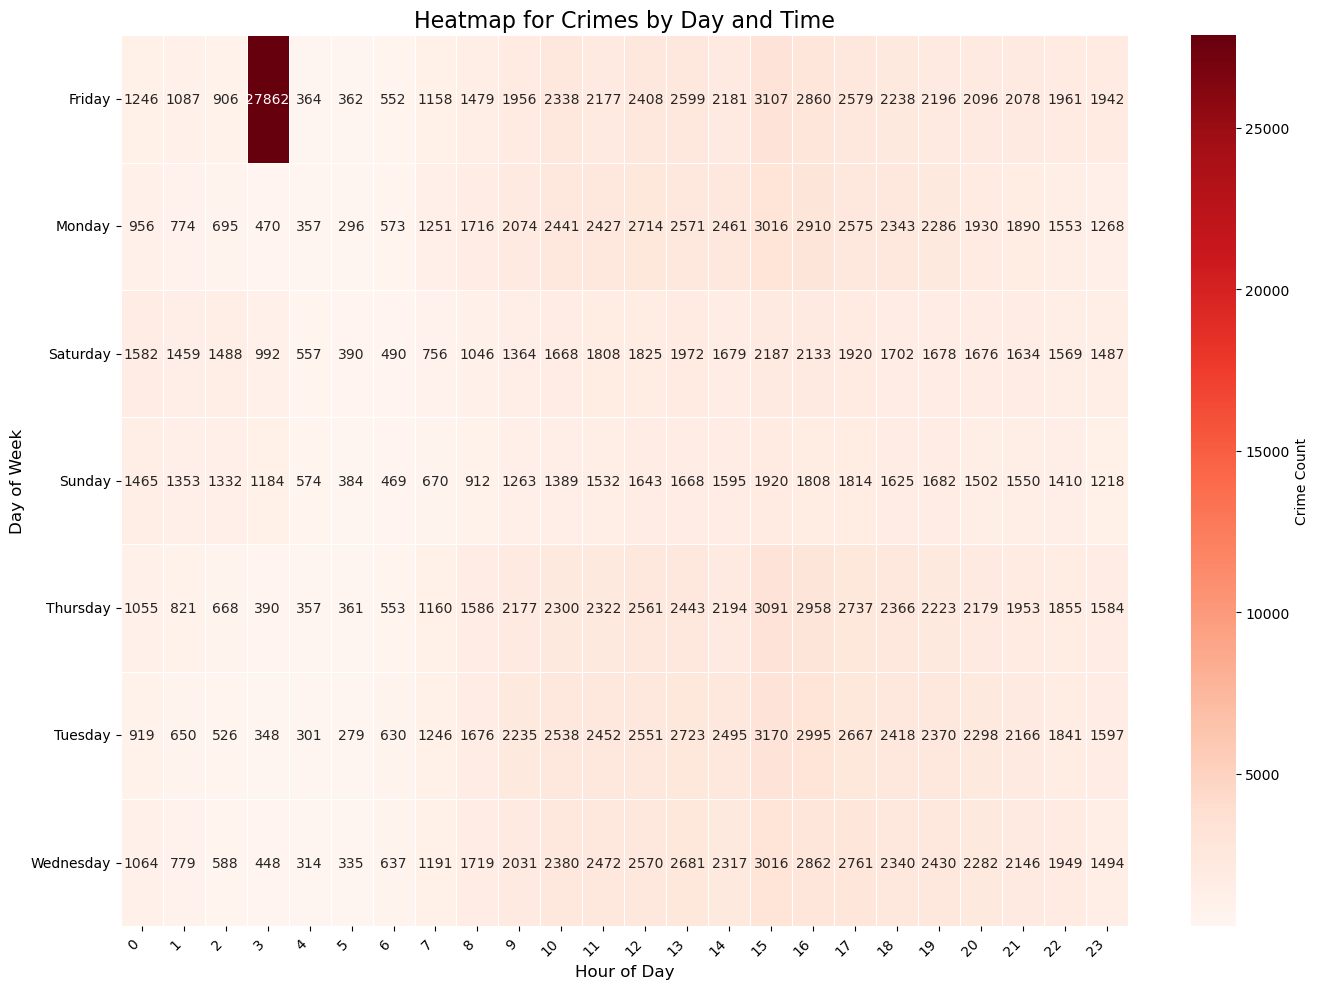


Hourly Crime Distribution:
 Hour
0      8287
1      6923
2      6203
3     31694
4      2824
5      2407
6      3904
7      7432
8     10134
9     13100
10    15054
11    15190
12    16272
13    16657
14    14922
15    19507
16    18526
17    17053
18    15032
19    14865
20    13963
21    13417
22    12138
23    10590
dtype: int64


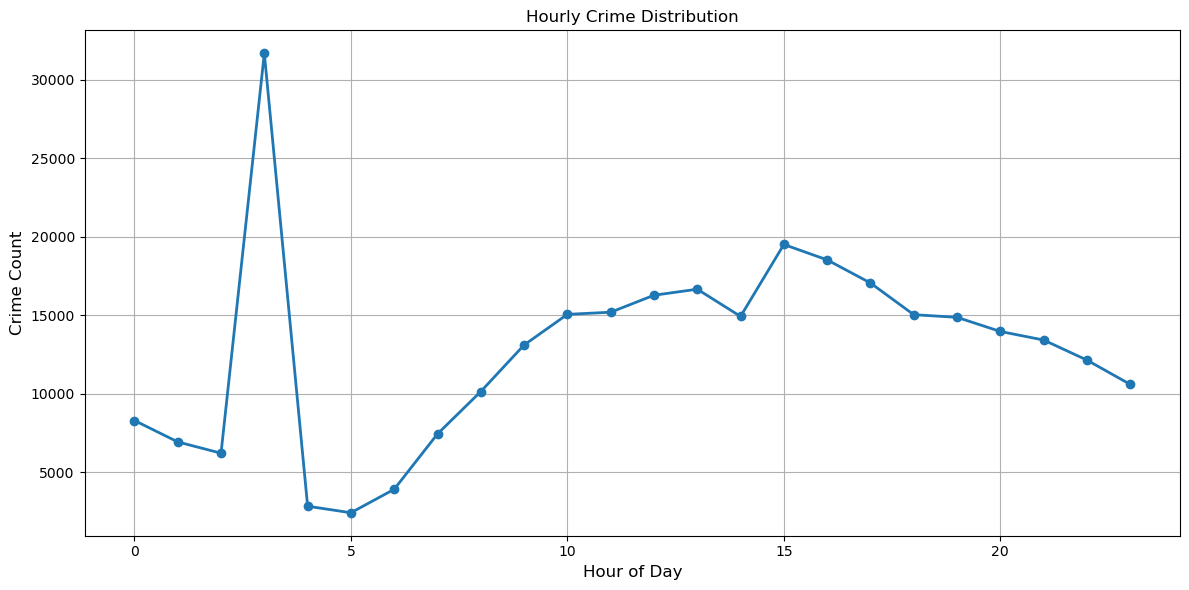

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'Dispatch Date / Time' is in datetime format
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'], errors='coerce')

# Heatmap for Crimes by Day and Time
df['DayOfWeek'] = df['Dispatch Date / Time'].dt.day_name()
df['Hour'] = df['Dispatch Date / Time'].dt.hour
day_hour_crime = df.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)

# Print the heatmap result data
print("Day of Week and Hour Crime Distribution:\n", day_hour_crime)

# Adjust the figure size and font size
plt.figure(figsize=(14, 10))  # Increased size
sns.heatmap(day_hour_crime, cmap='Reds', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Crime Count'}, annot_kws={"size": 10})
plt.title('Heatmap for Crimes by Day and Time', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Ensure everything fits well in the figure area
plt.show()

# Line Chart for Hourly Trends
hourly_trend = df.groupby('Hour').size()

# Print the hourly crime distribution
print("\nHourly Crime Distribution:\n", hourly_trend)

plt.figure(figsize=(12, 6))
hourly_trend.plot(kind='line', title='Hourly Crime Distribution', marker='o', linewidth=2)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Question 7: How does crime activity vary by month and year?
Analysis Approach:

Line Chart - for incidents by month.
Bar Chart - comparing monthly crime counts across years.

## Explanation:
We used the following methods to analyze crime activity by month and year:

Data Transformation: We converted the 'Dispatch Date / Time' column to a datetime format and extracted the year and month for trend analysis.

Aggregation: We grouped the data by year and month, then counted the number of incidents in each group to create a monthly crime incident table.

Visualization:

Stacked Bar Chart: We used this chart to visualize monthly crime incidents over the years. It helps compare crime levels across different years and identify seasonal trends.
Bar Chart: We plotted the average monthly crime count by year to compare the overall crime intensity for each year.
Statistical Methods Used:

Frequency Count: Counting the number of incidents per month and year.
Mean Calculation: Computing the average monthly crime count per year to summarize trends.
These methods help identify seasonal patterns and year-over-year changes in crime, useful for crime prevention strategies.



Monthly Crime Incidents Over Years:
Month    1     2     3     4      5     6     7     8     9     10    11    12
Year                                                                          
2017      0     0     0  7777   9037  6274  5701  6198  5594  4901  4798  4543
2018   4453  4255  4379  4584   4628  4661  4772  4709  4365  4718  4330  4446
2019   4170  3921  4618  4547   4799  4318  4442  4831  4076  3954  3782  3687
2020   4296  4229  4021  2858   3614  3463  3789  3800  3829  3837  3623  3728
2021   3540  3156  3880  3448  31117  3206  3651  3786  4026  4343  3896  3952
2022   3577  3928  4431  3892   4229  4116  3923   642     0     0     0     0


<Figure size 1200x800 with 0 Axes>

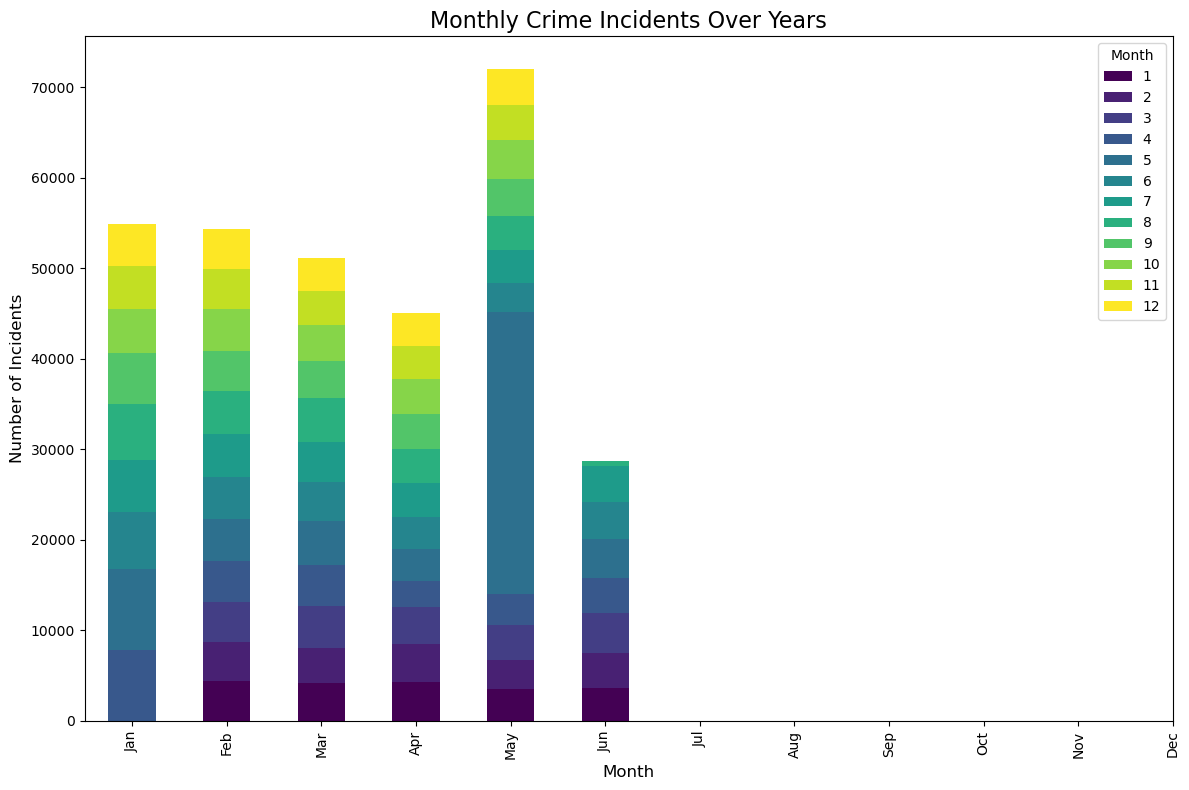


Average Monthly Crime Count by Year:
Year
2017    4568.583333
2018    4525.000000
2019    4262.083333
2020    3757.250000
2021    6000.083333
2022    2394.833333
dtype: float64


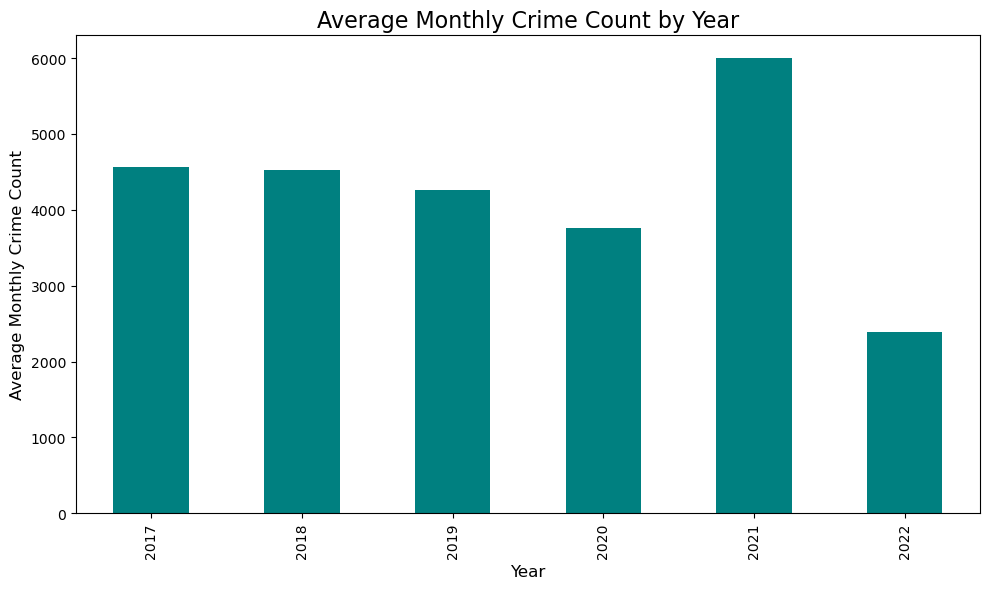

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Dispatch Date / Time' to datetime if it's not already in datetime format
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'], errors='coerce')

# Extract month and year for crime trend analysis
df['Year'] = df['Dispatch Date / Time'].dt.year
df['Month'] = df['Dispatch Date / Time'].dt.month

# Group data by Year and Month, then unstack to create a table of crime incidents per month across years
crime_monthly = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Print the monthly crime data for insight
print("Monthly Crime Incidents Over Years:")
print(crime_monthly)

# Stacked Bar Chart for Monthly Crime Incidents Over Years
plt.figure(figsize=(12, 8))  # Set figure size for better clarity
crime_monthly.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Set the title and labels for the stacked bar chart
plt.title('Monthly Crime Incidents Over Years', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the stacked bar chart
plt.tight_layout()
plt.show()

# Bar Chart for Average Monthly Crime Count by Year
crime_monthly_mean = crime_monthly.mean(axis=1)

# Print the average monthly crime count for each year
print("\nAverage Monthly Crime Count by Year:")
print(crime_monthly_mean)

# Plotting the bar chart for average monthly crime count by year
plt.figure(figsize=(10, 6))
crime_monthly_mean.plot(kind='bar', title='Average Monthly Crime Count by Year', color='teal')

# Set the title and labels for the bar chart
plt.title('Average Monthly Crime Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Monthly Crime Count', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()


## Question 8: 
What is the distribution of crime types across police districts, and how do they relate to the number of victims affected by each crime type?

## 1. Crime Count by Region and Crime Type
Statistical Method Used: Descriptive Statistics (Frequency Count)
What We Did:
We aggregated the data using the groupby() method to group by Police District Name (region) and Crime Name1 (crime type).
Then, we counted the number of occurrences of each crime type per region using the size() method.
The result was transformed using unstack() to make it more interpretable.

### Statistical Concept:

Descriptive Statistics: Specifically, we calculated frequencies (counts) of crime types within different regions. This is a form of descriptive analysis, as we are summarizing the distribution of crime types across regions.
Categorical Data Aggregation: This is a method used for summarizing and analyzing categorical data (regions and crime types). By grouping the data, we obtained a summary of how crimes are distributed, which is a typical descriptive statistic when working with categorical variables.

### Why This Method?
This method gives a clear, easy-to-understand breakdown of crime distribution by region and crime type.
Frequency counts help us see how many crimes fall into each category (crime type) within each region, which is important for understanding patterns in crime distribution.
Statistical Insight:
This analysis helps us understand if there are any dominant crime types in specific regions or if some regions are generally more crime-prone than others.

## 2. Victim Count by Crime Type
Statistical Method Used: Descriptive Statistics (Sum of Victims)
What We Did:
We used groupby() to group the dataset by the Crime Name1 column (crime type).
We then calculated the sum of victims for each crime type using the sum() method.

### Statistical Concept:
Descriptive Statistics: In this case, we used summation to calculate the total number of victims for each crime type, which gives us a central tendency (the total number) of the victims across different crime types.

Aggregating Continuous Data: Instead of counting occurrences (like in the previous analysis), we aggregated continuous data (the number of victims). Summing up victims across crime types gives us insight into the total human impact.

### Why This Method?

We used summation because we were interested in understanding the total number of victims for each crime type, not just how many times each crime occurred. This is a useful method to get a sense of the total severity of each crime type in terms of its human impact.

### Statistical Insight:
The sum of victims gives us a global perspective on how widespread and severe different types of crimes are. We can use this to compare crime types based on how many people they affect.
Key Statistical Methods Recap:
Frequency Count:

Statistical Method: groupby() and size() to count occurrences.
Purpose: Understand the distribution of crimes across regions.
Summation:

Statistical Method: groupby() and sum() to calculate total victims per crime type.
Purpose: Understand the total human impact of each crime type.
Conclusion:
These two analyses used basic descriptive statistics:
Frequency counts for crime types by region (categorical analysis).
Summation for victims by crime type (aggregation of continuous data).
Both methods are important for summarizing the dataset and identifying trends or patterns in the data, which can then be used to inform decision-making or further analysis.

C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1411816630.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_region = crime_type_filter.groupby(['Police District Name', 'Crime Name1']).size().unstack(fill_value=0)


Crime Count by Region and Crime Type:
Crime Name1           Crime Against Person  Crime Against Property  \
Police District Name                                                 
BETHESDA                              2925                   24516   
CITY OF TAKOMA PARK                    518                    3292   
GERMANTOWN                            4997                   18354   
MONTGOMERY VILLAGE                    6383                   21853   
OTHER                                   28                     102   
ROCKVILLE                             3551                   17511   
SILVER SPRING                         6055                   29495   
TAKOMA PARK                             97                     811   
Unknown                                 15                      48   
WHEATON                               5701                   23900   

Crime Name1           Crime Against Society  Not a Crime  Other  Unknown  
Police District Name                          

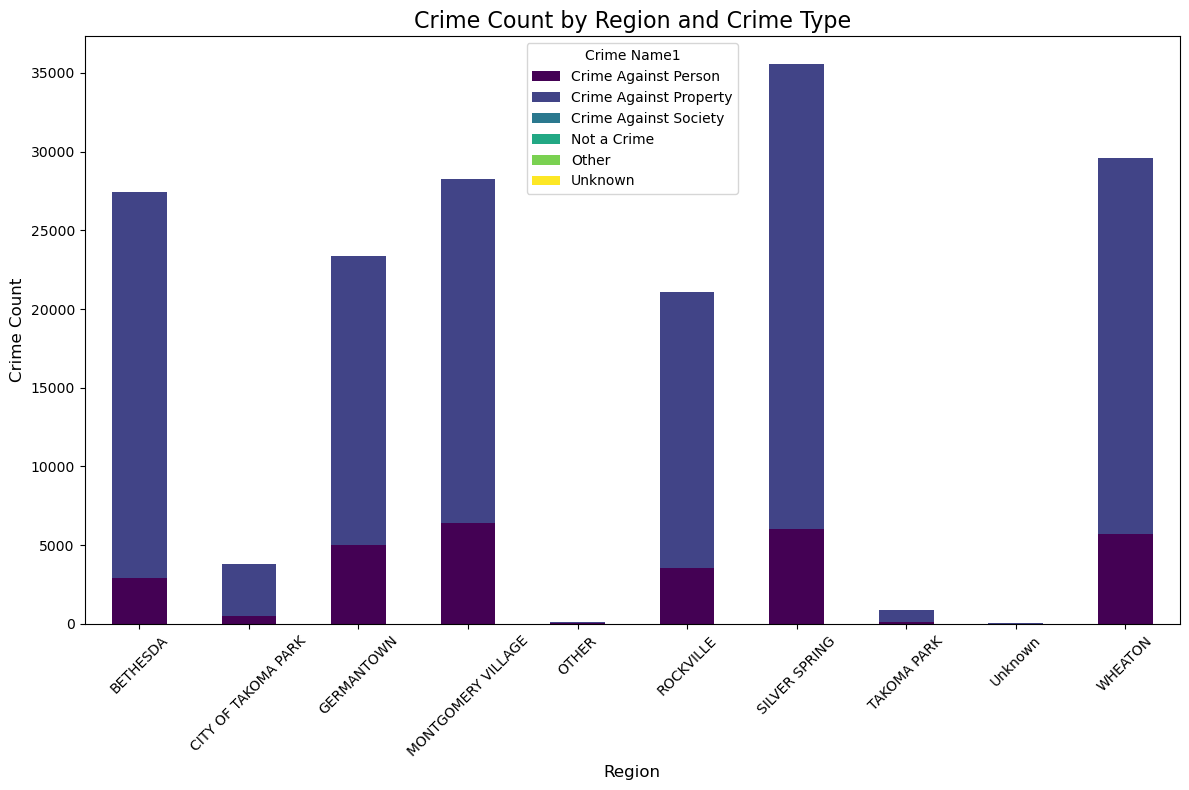


Victim Count by Crime Type:
Crime Name1
Crime Against Person       36533
Crime Against Property    139882
Crime Against Society      68917
Not a Crime                 3577
Other                      63850
Unknown                      281
Name: Victims, dtype: int64


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\1411816630.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victim_count_by_type = df.groupby('Crime Name1')['Victims'].sum()


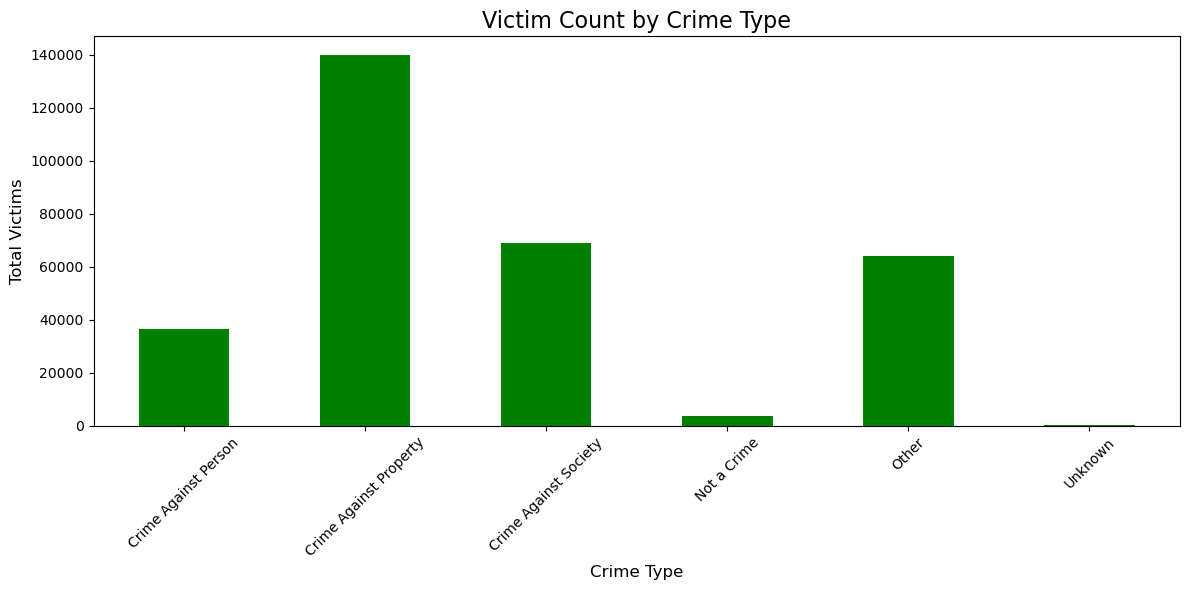

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for relevant crime types: 'Crime Against Property' and 'Crime Against Person'
crime_type_filter = df[df['Crime Name1'].isin(['Crime Against Property', 'Crime Against Person'])]

# 1. Crime Count by Region and Crime Type
crime_by_region = crime_type_filter.groupby(['Police District Name', 'Crime Name1']).size().unstack(fill_value=0)

# Print the result
print("Crime Count by Region and Crime Type:")
print(crime_by_region)

# Plotting the crime count by region and crime type
crime_by_region.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Crime Count by Region and Crime Type', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Victim Count by Crime Type
victim_count_by_type = df.groupby('Crime Name1')['Victims'].sum()

# Print the result
print("\nVictim Count by Crime Type:")
print(victim_count_by_type)

# Plotting the victim count by crime type
victim_count_by_type.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Victim Count by Crime Type', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 9: 
hat are the trends in crime distribution based on the time of day (hour) for each crime type?
This question helps us understand the hourly distribution of different crime types to identify any patterns related to time. For instance, some crimes may peak at night, while others may be more frequent during the day.

### Statistical Approach:
Method Used: Time Series Analysis and Bar Plot Visualization.
Time series analysis helps us identify trends over time.
GroupBy will be used to group the data by hour of the day and crime type to calculate the crime counts.

### Explanation:
Why We Use This Method:
We use time series analysis to analyze trends over hours of the day. By grouping data by hours and crime types, we can see how the frequency of crimes varies throughout the day, which helps identify crime patterns linked to specific hours.
The bar plot shows the distribution of crimes across different hours for each crime type, while the line plot gives a clearer view of crime trends over the course of the day.

C:\Users\anees\AppData\Local\Temp\ipykernel_7208\4057712408.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_hour = df.groupby(['hour', 'Crime Name1']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

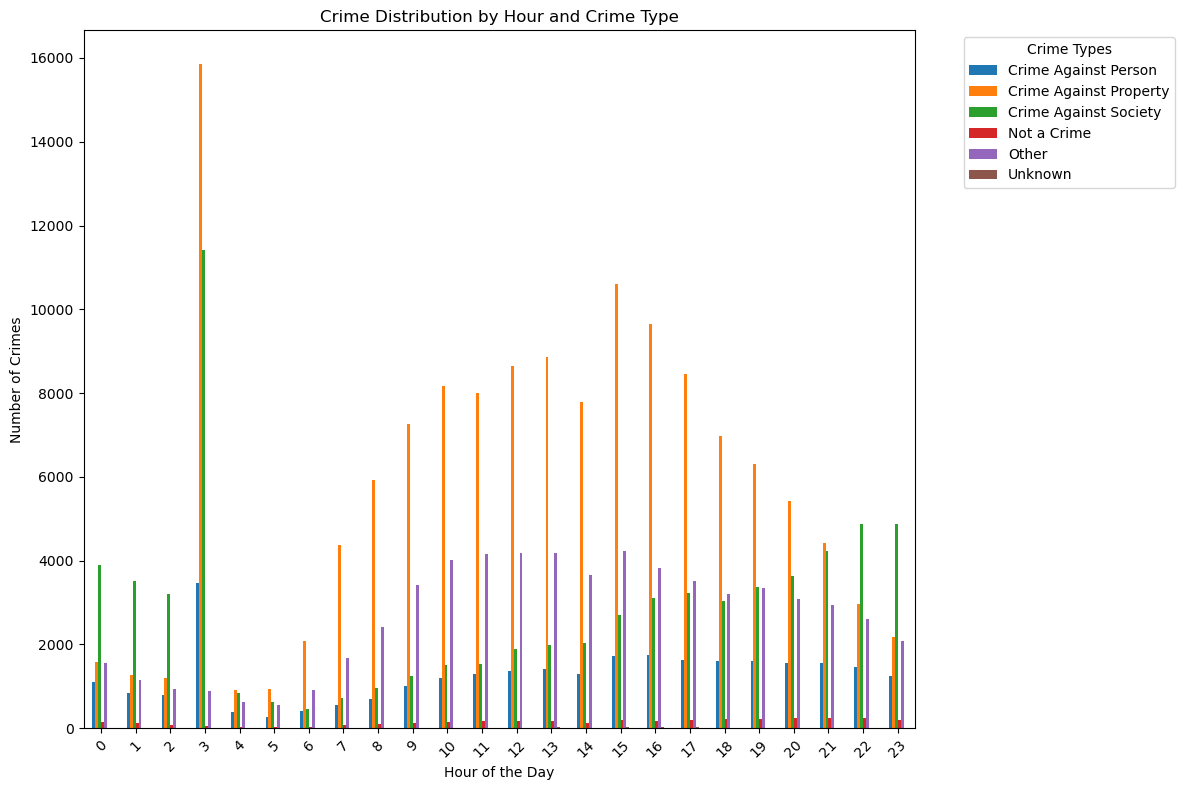

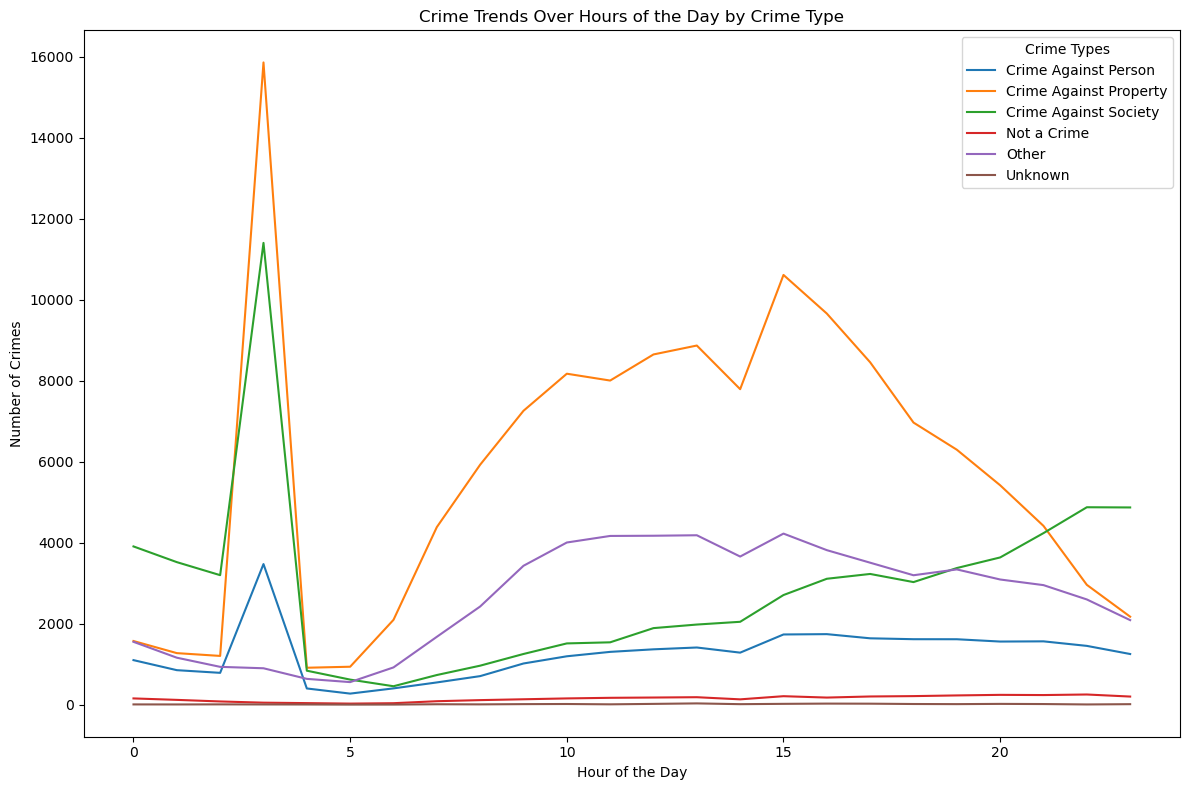

Crime by Hour and Crime Type Summary:
Crime Name1  Crime Against Person  Crime Against Property  \
count                   24.000000               24.000000   
mean                  1261.250000             5828.416667   
std                    651.134211             3778.339858   
min                    272.000000              911.000000   
25%                    834.500000             2152.500000   
50%                   1293.500000             6112.000000   
75%                   1576.000000             8245.500000   
max                   3472.000000            15865.000000   

Crime Name1  Crime Against Society  Not a Crime        Other    Unknown  
count                    24.000000    24.000000    24.000000  24.000000  
mean                   2871.541667   148.958333  2632.416667  11.333333  
std                    2259.156595    69.493496  1289.827387   7.916228  
min                     454.000000    25.000000   556.000000   0.000000  
25%                    1446.750000   104.2

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your crime dataset

# Extract hour from 'Dispatch Date / Time' column
df['hour'] = pd.to_datetime(df['Dispatch Date / Time']).dt.hour

# Group by hour and Crime Name1, then count occurrences
crime_by_hour = df.groupby(['hour', 'Crime Name1']).size().unstack(fill_value=0)

# Plotting the hourly distribution for each crime type
plt.figure(figsize=(12, 8))

# Visualization 1: Bar plot for Crime Type over Hours
crime_by_hour.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Crime Distribution by Hour and Crime Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Line plot for Crime Type over Hours
crime_by_hour.plot(kind='line', figsize=(12, 8))
plt.title('Crime Trends Over Hours of the Day by Crime Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Types')
plt.tight_layout()
plt.show()

# Print summary statistics for hourly distribution
print("Crime by Hour and Crime Type Summary:")
print(crime_by_hour.describe())


### Question 10: 
How does the crime distribution vary between weekdays and weekends across different crime types?

This question investigates the potential difference in crime rates between weekdays and weekends, helping to understand whether certain crimes are more common on weekends or during weekdays.

### Statistical Approach:
Method Used: Comparison of Means (t-test or ANOVA).
A t-test can be used to compare the mean crime rates between weekends and weekdays for each crime type.
Boxplots or Bar plots can visualize the distribution and differences between weekdays and weekends.


C:\Users\anees\AppData\Local\Temp\ipykernel_7208\2433877716.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_day = df.groupby(['weekend', 'Crime Name1']).size().unstack(fill_value=0)


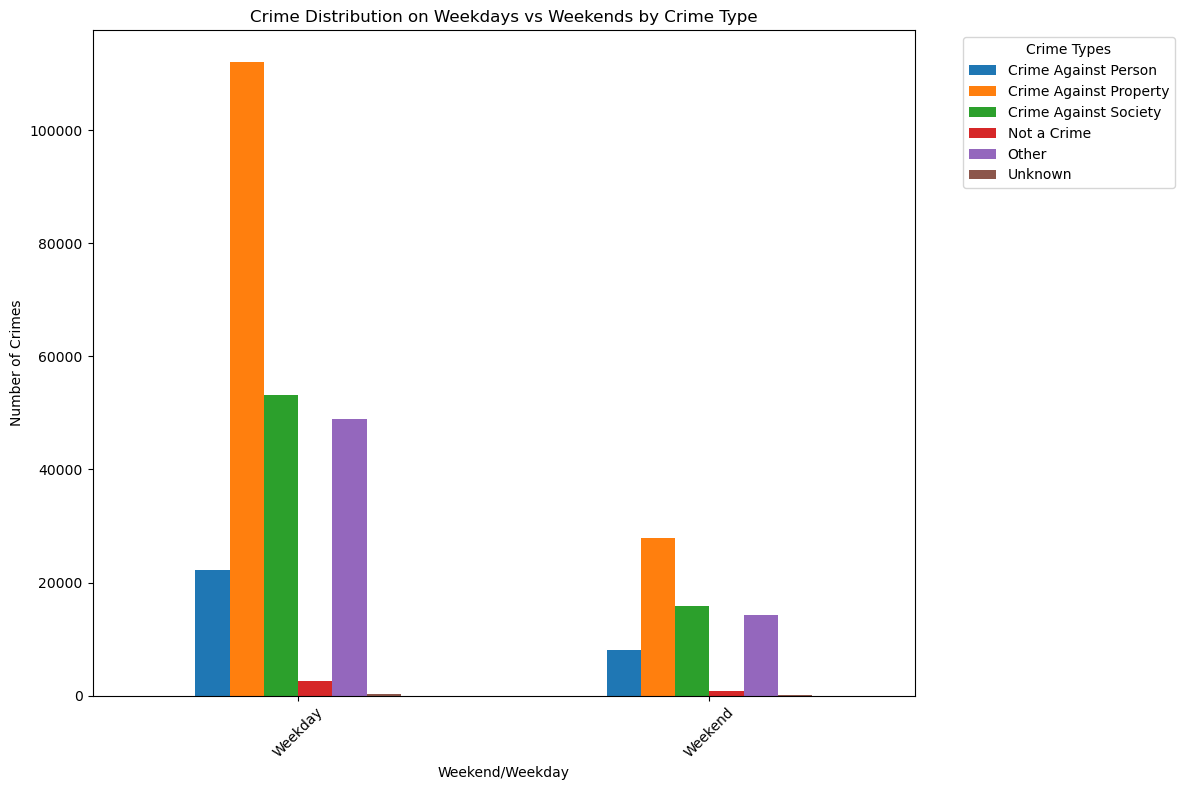

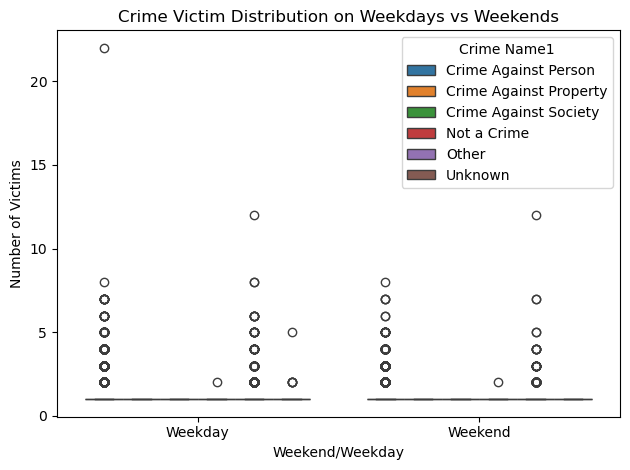

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Crime Type: Crime Against Society
t-statistic: nan, p-value: nan
No statistically significant difference between weekdays and weekends.
Crime Type: Crime Against Property
t-statistic: nan, p-value: nan
No statistically significant difference between weekdays and weekends.
Crime Type: Crime Against Person
t-statistic: -4.663937734844731, p-value: 3.1307239401612556e-06
There is a statistically significant difference between weekdays and weekends.
Crime Type: Other
t-statistic: 0.08200772844699039, p-value: 0.9346413302108858
No statistically significant difference between weekdays and weekends.
Crime Type: Not a Crime
t-statistic: -0.6390811374075113, p-value: 0.5229061572170695
No statistically significant difference between weekdays and weekends.
Crime Type: Unknown
t-statistic: 1.9768395829814112, p-value: 0.04930873508647665
There is a statistically significant difference between weekdays and weekends.


In [88]:
import numpy as np
import seaborn as sns
from scipy import stats

# Extract day of the week from 'Dispatch Date / Time'
df['day_of_week'] = pd.to_datetime(df['Dispatch Date / Time']).dt.dayofweek
df['weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by 'weekend' and 'Crime Name1' and count occurrences
crime_by_day = df.groupby(['weekend', 'Crime Name1']).size().unstack(fill_value=0)

# Visualization 1: Bar plot comparing crimes on weekdays vs weekends
crime_by_day.plot(kind='bar', figsize=(12, 8))
plt.title('Crime Distribution on Weekdays vs Weekends by Crime Type')
plt.xlabel('Weekend/Weekday')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Box plot showing distribution of crimes by weekend/weekday
sns.boxplot(data=df, x='weekend', y='Victims', hue='Crime Name1')
plt.title('Crime Victim Distribution on Weekdays vs Weekends')
plt.xlabel('Weekend/Weekday')
plt.ylabel('Number of Victims')
plt.tight_layout()
plt.show()

# Statistical Test: ANOVA or t-test to compare crime distributions between weekdays and weekends for each crime type
for crime_type in df['Crime Name1'].unique():
    crime_data = df[df['Crime Name1'] == crime_type]
    weekday_data = crime_data[crime_data['weekend'] == 'Weekday']['Victims']
    weekend_data = crime_data[crime_data['weekend'] == 'Weekend']['Victims']
    
    t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data, equal_var=False)
    print(f"Crime Type: {crime_type}")
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    if p_value < 0.05:
        print("There is a statistically significant difference between weekdays and weekends.")
    else:
        print("No statistically significant difference between weekdays and weekends.")
